In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label,regionprops
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import distance

In [2]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces, x, y = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.7)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

## Import de nodule_mask.npzet lung_img.npz

In [3]:
INPUT_FOLDER = '/Users/anthonypamart/Documents/SIR/Projets/CEI/Taff 15 mars/slices'
patients_short = os.listdir(INPUT_FOLDER)

images = os.listdir(INPUT_FOLDER)
images_path = [os.path.join(INPUT_FOLDER,patient) for patient in patients_short]

In [4]:
##On crée 2 listes dans lesquels on écrit respectivement les paths des lung_img et les paths des nodule_mask 
images_path_lung_img = []
images_path_nodule_mask = []
for i in range(0,len(images_path)):
    if(images_path[i][-19:-8]=='nodule_mask'):
        images_path_nodule_mask.append(images_path[i])
    elif(images_path[i][-16:-8]=='lung_img'):
        images_path_lung_img.append(images_path[i])
    else:
        print(images_path[i])
        
##On sort ces listes pour avoir les slices d'un meme patient côte à côte
images_path_lung_img.sort()
images_path_nodule_mask.sort()

/Users/anthonypamart/Documents/SIR/Projets/CEI/Taff 15 mars/slices/.DS_Store


In [5]:
## Liste des id des patients
id_patients = []
for i in range(0,len(images_path_lung_img)):
    id_patients.append(images_path_lung_img[i][67:131])
id_patients = list(set(id_patients)) ##On tej les doublons

In [6]:
plt.imshow(np.load(images_path_nodule_mask[110]), cmap = plt.cm.bone)
#plt.show()

In [7]:
plt.imshow(np.load(images_path_lung_img[110]), cmap = plt.cm.bone)
#plt.show()

In [8]:
##PAS A METTRE DANS LE SCRIPT

##On charge nos .npz dans un numpy array

#nodule_mask = np.load(images_path_nodule_mask[110])
#lung_img = np.load(images_path_lung_img[110])

nodule_mask = np.load(images_path_nodule_mask[104])
lung_img = np.load(images_path_lung_img[104])

## Application d'un nodule_mask à une lung_img.npz

In [84]:
##Applique le nodule_mask au lung_img et renvoie donc le nodule_segmented
def get_nodule_segmented(nodule_mask,lung_img):
    nodule_segmented = lung_img.copy()
    for i in range(0,len(nodule_segmented)):
        for j in range(0,len(nodule_segmented)):
            if(nodule_mask[i][j]==0.0):
                nodule_segmented[i][j]=0.0
    return nodule_segmented

In [85]:
##PAS A METTRE DANS LE SCRIPT
nodule_segmented = get_nodule_segmented(nodule_mask,lung_img)

In [86]:
plt.imshow(nodule_segmented, cmap = plt.cm.bone)
#plt.show()

In [87]:
##Prend le nodule mask et renvoie les coordonnées des centres des nodules présents et le nb de nodules présents
def get_centers_nodules(nodule_mask):
    label_scan = label(nodule_mask)
    areas = [r.area for r in regionprops(label_scan)]
    #areas.sort()
    center_full = [r.centroid  for r in regionprops(label_scan)]
    nb_nodules = len(center_full)
    return center_full, nb_nodules

In [56]:
"""""
##PAS A METTRE DANS LE SCRIPT

##Calcule le nombre max de nodules dans toutes les slices
a = []
cnt1=0
cnt2=0
cnt=0
for i in range(0,len(images_path_nodule_mask)):
    nodule_mask = np.load(images_path_nodule_mask[i])
    center_full, nb_nodules = get_centers_nodules(nodule_mask)
    a.append(len(center_full))
    if(len(center_full)==1):
       cnt1 += 1
    elif(len(center_full)==2):
       cnt2 += 1
    else:
       cnt += 1
print 'max a = ', max(a)
print 'cnt1 = ', cnt1
print 'cnt2 = ', cnt2
print 'cnt = ', cnt
print(a)
""""""

max a =  2
cnt1 =  844
cnt2 =  43
cnt =  0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [88]:
##PAS A METTRE DANS LE SCRIPT
center_full, nb_nodules = get_centers_nodules(nodule_mask)

In [89]:
##PAS A METTRE DANS LE SCRIPT

##On prend un patch 2D de taille 32x32 autour de chaque nodule détecté
SIZE_PATCH = 32

##Attention à bien prendre toujours les coordonnees du centre d'un meme nodule, visualisez center_full pour être sur
first_nodule = nodule_segmented[int(center_full[0][0])-SIZE_PATCH/2:int(center_full[0][0])+SIZE_PATCH/2,int(center_full[0][1])-SIZE_PATCH/2:int(center_full[0][1])+SIZE_PATCH/2]

In [90]:
plt.imshow(second_nodule, cmap = plt.cm.bone)
#plt.show()

## Passage en 3D

- On prendra tout au long l'exemple du patient dont les slices se retrouvent avec "images_path_nodule_mask[99:116]"
- (on a sorté images_path_nodule_mask au début du notebook)    
- (ID de ce patient : 1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097), correspond à id_patients[13]

In [92]:
##Pour récupérer le path des lung_img pour le patient dont on précise l'ID
def get_patients_path_lung_img(images_path_lung_img, ID='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097'):
    patients_path_lung_img = []
    for i in range(0,len(images_path_lung_img)):
        #if(images_path_lung_img[i][67:131]==id_patients[0]):
        if(images_path_lung_img[i][67:131]==ID):
            patients_path_lung_img.append(images_path_lung_img[i])
    patients_path_lung_img.sort()
    return patients_path_lung_img

In [93]:
##Pour récupérer le path des nodule_mask pour le patient dont on précise l'ID
def get_patients_path_nodule_mask(images_path_nodule_mask, ID='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097'):
    patients_path_nodule_mask = []
    for i in range(0,len(images_path_nodule_mask)):
        if(images_path_nodule_mask[i][67:131]==ID):
            patients_path_nodule_mask.append(images_path_nodule_mask[i])
    patients_path_nodule_mask.sort()
    return patients_path_nodule_mask

In [109]:
##PAS A METTRE DANS LE SCRIPT

patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img, id_patients[6])
patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask, id_patients[6])

#patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img)
#patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask)

In [110]:
##Pour le patient pris en exemple, on construit nodule_mask_3D, lung_img_3D et nodule_segmented_3D

##On met en entrée le path des nodule_mask du patient et on a en sortie un np array 3D avec le nodule mask (2D)
##de toutes les slices (ce qui ajoute une 3e dimension)
def get_nodule_mask_3D(patients_path_nodule_mask, dim_x=512, dim_y=512):
    nodule_mask_3D = np.zeros((dim_x, dim_y, len(patients_path_nodule_mask)))
    for i in range(0,len(patients_path_nodule_mask)):
        nodule_mask_3D[:,:,i] = np.load(patients_path_nodule_mask[i]) 
    return nodule_mask_3D

##On met en entrée le path des lung_img du patient et on a en sortie un np array 3D avec la lung_img (2D)
##de toutes les slices (ce qui ajoute une 3e dimension)
def get_lung_img_3D(patients_path_lung_img, dim_x=512, dim_y=512):
    lung_img_3D = np.zeros((dim_x, dim_y, len(patients_path_lung_img)))
    for i in range(0,len(patients_path_lung_img)):
        lung_img_3D[:,:,i] = np.load(patients_path_lung_img[i])
    return lung_img_3D

##On met en entrée le path des lung_img du patient et le path des nodule_mask et on a en sortie un np array 3D
##avec le nodule segmenté (2D) de toutes les slices (ce qui rajoute une 3e dimension)
def get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img, dim_z = len(patients_path_lung_img), dim_x =512, dim_y=512):
    nodule_segmented_3D = np.zeros((dim_x, dim_y, dim_z))
    
    a= min(len(patients_path_lung_img), dim_z)
    for i in range(0,a):
        nodule_segmented_3D[:,:,i] = get_nodule_segmented(get_nodule_mask_3D(patients_path_nodule_mask)[:,:,i],get_lung_img_3D(patients_path_lung_img)[:,:,i])
    return nodule_segmented_3D

In [111]:
##PAS A METTRE DANS LE SCRIPT
nodule_segmented_3D = get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img)

In [112]:
#plt.imshow(nodule_segmented_3D[:,:,11], cmap=plt.cm.gray)
#plt.show()

In [113]:
##On stock les center_full et les nb_nodules dans des listes center_full_3D et nb_nodules_3D

def get_center_nodules_3D(patients_path_nodule_mask):
    center_full_3D = []
    nb_nodules_3D = []

    for i in range(0, len(patients_path_nodule_mask)):
        nodule_mask_3D = get_nodule_mask_3D(patients_path_nodule_mask)
        center_full, nb_nodules = get_centers_nodules(nodule_mask_3D[:,:,i])
        center_full_3D.append(center_full)
        nb_nodules_3D.append(nb_nodules)
        
    return center_full_3D, nb_nodules_3D

In [114]:
##PAS A METTRE DANS LE SCRIPT
center_full_3D, nb_nodules_3D = get_center_nodules_3D(patients_path_nodule_mask)

In [116]:
##PAS A METTRE DANS LE SCRIPT

##On prend un patch 2D de taille 32x32 autour de chaque nodule détecté
SIZE_PATCH = 32

##Attention à bien prendre toujours les coordonnees du centre d'un meme nodule, visualisez center_full pour être sur
first_nodule_3D = np.zeros((first_nodule.shape[0], first_nodule.shape[1], len(nb_nodules_3D)))
for i in range(0,len(nb_nodules_3D)):
    first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][0][0])-SIZE_PATCH/2:int(center_full_3D[i][0][0])+SIZE_PATCH/2,int(center_full_3D[i][0][1])-SIZE_PATCH/2:int(center_full_3D[i][0][1])+SIZE_PATCH/2,i]

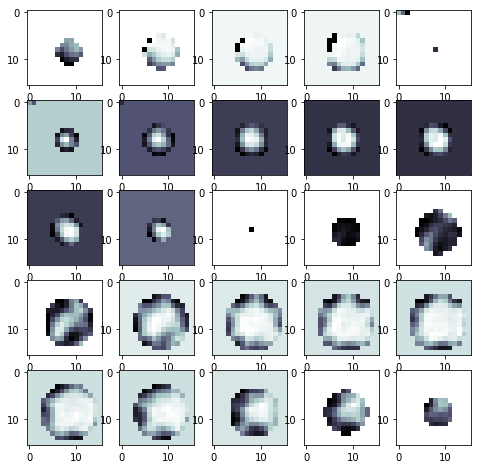

In [169]:
##Plot First Nodule

fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(0, 25):
    img = first_nodule_3D[:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = plt.cm.bone)
plt.show()

In [34]:
#plot_3d(second_nodule_3D, 0) ##Seuil à optimiser

- Admettons qu'on décide de donner au réseau de neurone 1 seul nodule et qu'on fixe sa taille à 16x16x16 (on fera du padding ou on tejera des coupes en trop si necessaire)
- Avec la fonction ci dessous, si il y a plus de slices que 16, on ne prends pas en compte celles en trop et si il y en a moins que 16, on pad
- Si on décommente les 2 lignes en commentaires, on récupère le vrai nodule en 3D, sans troncature ou padding

In [141]:
##A partir des paths vers lesquels on trouve lung_img et mask_nodule et de l'ID du patient, on récupère un npdule 3D de taille 32x32x32
def npz_to_cnn(images_path_lung_img, images_path_nodule_mask, ID, dimx_nodule = 32, dimy_nodule = 32, dimz_nodule = 32):
    patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img, ID)
    patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask, ID)
    nodule_segmented_3D = get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img, dimz_nodule)
    center_full_3D, nb_nodules_3D = get_center_nodules_3D(patients_path_nodule_mask)
    a = min(len(center_full_3D), dimz_nodule)
    
    first_nodule_3D = np.zeros((dimx_nodule, dimy_nodule, dimz_nodule)) 
    
    #for i in range(0,len(nb_nodules_3D)):
    for i in range(0,a):
        first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][-1][0])-dimx_nodule/2:int(center_full_3D[i][-1][0])+dimx_nodule/2,int(center_full_3D[i][-1][1])-dimy_nodule/2:int(center_full_3D[i][-1][1])+dimy_nodule/2,i]
    return first_nodule_3D, center_full_3D

In [267]:
%%time

nodule_3D, center_full_3D = npz_to_cnn(images_path_lung_img, images_path_nodule_mask, id_patients[29])
#plot_3d(nodule_3D)

[(316.5, 170.5)]
[(316.5, 170.5)]
[(316.5, 170.5)]
[(316.5, 170.5)]
[(309.5, 173.5), (312.0, 161.0)]
[(309.5, 173.5), (312.0, 161.0)]
[(309.5, 173.5), (312.0, 161.0)]
[(309.5, 173.5)]
[(271.0, 169.0)]
[(271.0, 169.0), (304.0, 192.0)]
[(271.0, 169.0), (304.0, 192.0)]
[(271.0, 169.0), (304.0, 192.0)]
[(271.0, 169.0), (304.0, 192.0)]
[(304.0, 192.0)]
[(304.0, 192.0)]
[(304.0, 192.0)]
CPU times: user 5.12 s, sys: 613 ms, total: 5.74 s
Wall time: 5.94 s


- Problème 2) le fait que dans le preprocessing, on selectionne uniquement les deux plus grosses areas d'une slice fausse la détection 3D des nodules (sur une slice, les 2 plus gros nodules ne sont pas forcément ceux qui ont la plus grosse area sur la slice en question, ça dépend si la slice les coupe en plein milieu ou au niveau d'une extremité)

## Implémentation du CNN

In [9]:
from keras import layers
from keras import models
from keras import optimizers
from CNN_Classification import CNN_Classification

/Users/anthonypamart/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
model = CNN_Classification()

In [ ]:
#train_images = np.reshape(first_nodule_3D, (1,32,32,32,1))
#train_images = np.reshape(np.zeros((32,32,32)), (1,32,32,32,1))
train_labels = np.zeros((1,1))
model.fit(train_images, train_labels, epochs=5, batch_size=1)